<a href="https://colab.research.google.com/github/buttersaltpepper/Financial-Data-Analytics/blob/main/Sharpe%26IR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computing Sharpe and Information Ratio**

In [1]:
asset_lists = [
    'SPY', # SPY -> Benchmark
    'IJR', # iShares Core S&P Small-Cap ETF
    'IVV', # iShares Core S&P 500 ETF
    'AGG', # iShares Core U.S. Aggregate Bond ETF
    'XLE', # Energy Select Sector SPDR Fund
    'XLF', # Financial Select Sector SPDR Fund
    'XLU', # Utilities Select Sector SPDR Fund
    'XLI', # Industrial Select Sector SPDR Fund
    'XLK', # Technology Select Sector SPDR Fund
    'XLV', # Health Care Select Sector SPDR Fund
    'XLP', # Consumer Staples Select Sector SPDR Fund
    'XLY', # Consumer Discretionary Select Sector SPDR Fund
    'IYR', # iShares U.S. Real Estate ETF
    'GLD', # SPDR Gold Shares
    'USO', # United States Oil Fund, LP
    'BTC-USD', # Bitcoin
]

In [2]:
! pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
import yfinance as yf

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15,8)

# **Pulling data**

In [4]:
data = yf.download(asset_lists)['Adj Close'].dropna()
data.head()

[*********************100%***********************]  16 of 16 completed


,AGG,BTC-USD,GLD,IJR,IVV,IYR,SPY,USO,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,,,,,,
2014-09-17,89.697540,457.334015,117.540001,48.441841,173.461273,54.247074,172.454666,280.079987,67.812424,16.320002,46.522472,35.952526,36.574593,32.620079,56.466316,61.803387
2014-09-18,89.705856,424.440002,117.779999,48.735386,174.371368,53.852161,173.373901,276.959991,67.462067,16.479183,46.744499,36.166328,36.646931,32.384079,56.886139,62.074505
2014-09-19,89.854675,394.795990,117.089996,48.130478,174.165283,53.882534,173.217667,276.559998,67.406731,16.436098,46.699032,36.089394,36.741558,32.675980,56.948475,62.100792
2014-09-22,89.978706,402.152008,116.849998,47.618973,172.894669,53.404099,171.879898,273.519989,66.414932,16.324903,46.175671,35.847851,36.676849,32.430161,56.641262,61.230331
2014-09-23,90.061363,435.790985,117.599998,47.143055,171.941772,53.100311,170.895996,275.519989,66.220871,16.213709,45.798176,35.767323,36.353355,32.338009,56.307705,60.704437


# **Sharpe Ratio: Rolling 12-month**
* The Sharpe ratio is a simple metric of risk adjusted return.
* It is simply $S = \frac{R_p - r_f}{σ_p}$
* It determines how much risk is being taken to achieve a certain level of return in excess of the risk free rate.
* Since this is not relative to the benchmark, it cannot be used as a relative comparison.
* The next performance metric **Information Ratio** is a better performance metric when investors are wanting to beat a benchmark

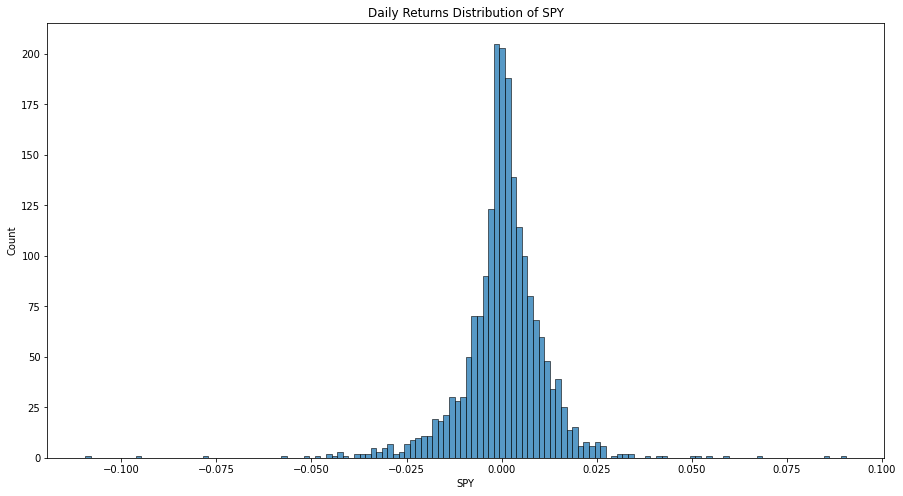

In [5]:
# Calculate Daily Returns
daily_rets = data.pct_change()[1:]

# Plot distribution of SPY returns
plt.title('Daily Returns Distribution of SPY')
sns.histplot(daily_rets.SPY);

In [21]:
print('Skew: ', (daily_rets.SPY).skew())
print('Kurtosis: ', (daily_rets.SPY).kurtosis())

Skew:  -0.6512008642620667
Kurtosis:  13.44938661796142


# **Skew and Kurtosis**
* Skewness and Kurtosis helps build a view of risk
* Positive Skew is preferred as it has high probability of returns of right hand side
* Positive skew also has predictable left-hand distribution of negative returns


* Kurtosis measures thickness of tails/extreme returns
* Normal distribution has Kurtosis of 3, so we calculate the Excess Kurtosis (so 0 Excess Kurtosis is normal)
* High excess kurtosis indicates high risk (thicker tails, extreme returns are more common) so when large moves happend, this can be bad if portfolio mvoes in wrong direction



In [7]:
# rolling mean returns
roll_rets = daily_rets.rolling(365).mean().dropna()
# Annualise returns
roll_rets = ((1+roll_rets)**252)-1


# rolling mean stdev
roll_stdev = daily_rets.rolling(365).std().dropna()

# annualise stdev
roll_stdev = roll_stdev*np.sqrt(252)

In [8]:
roll_rets

,AGG,BTC-USD,GLD,IJR,IVV,IYR,SPY,USO,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,,,,,,
2016-03-01,0.033827,0.207056,0.014040,0.013068,0.025631,0.074107,0.024982,-0.564675,-0.239152,-0.017424,0.018905,0.068495,0.128144,0.106838,0.066404,0.111914
2016-03-02,0.032980,0.246265,0.018028,0.014944,0.025044,0.085223,0.024389,-0.556293,-0.223413,-0.016572,0.016081,0.066209,0.128876,0.116384,0.062137,0.107852
2016-03-03,0.032644,0.302807,0.034415,0.031343,0.028397,0.088557,0.027804,-0.557500,-0.214805,-0.010154,0.021792,0.067776,0.130794,0.114100,0.059282,0.112043
2016-03-04,0.030555,0.263831,0.034755,0.042976,0.036080,0.097286,0.035622,-0.540562,-0.201498,-0.002731,0.032652,0.074646,0.135491,0.128559,0.061497,0.122146
2016-03-07,0.029707,0.199760,0.033726,0.058600,0.040742,0.103033,0.040295,-0.527541,-0.186808,0.001659,0.040631,0.071770,0.137586,0.135088,0.071730,0.125471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,-0.098778,-0.432604,-0.051120,-0.115945,-0.056348,-0.059270,-0.056723,0.401042,0.398485,-0.052896,-0.090783,-0.062404,0.037983,0.082248,0.034244,-0.088467
2022-09-27,-0.099811,-0.424033,-0.053736,-0.117278,-0.060308,-0.069775,-0.060555,0.421851,0.417114,-0.060301,-0.094243,-0.061425,0.021600,0.063771,0.026769,-0.091348
2022-09-28,-0.089239,-0.377833,-0.038221,-0.094229,-0.044392,-0.058780,-0.044467,0.460423,0.462107,-0.045558,-0.077724,-0.049114,0.032865,0.075440,0.042208,-0.067023


In [9]:
# Risk free ratio of 0
risk_free = 0

# Sharpe Ratio
sharpe_df = (roll_rets - 0) / roll_stdev

In [10]:
sharpe_df = pd.concat([pd.DataFrame(roll_rets.iloc[-1,:].rename('mu')).T, 
           pd.DataFrame(roll_stdev.iloc[-1,:].rename('std')).T, 
           pd.DataFrame(sharpe_df.iloc[-1,:].rename('Sharpe')).T]).T

sharpe_df.sort_values('Sharpe', ascending=False)

,mu,std,Sharpe
XLE,0.478884,0.325317,1.472051
USO,0.479107,0.388383,1.233595
XLU,0.040945,0.173094,0.236548
XLV,0.028959,0.159062,0.182061
XLP,0.013084,0.148388,0.088177
XLF,-0.043120,0.215996,-0.199635
XLK,-0.061465,0.258801,-0.237500
IVV,-0.054788,0.191884,-0.285527
SPY,-0.054886,0.191712,-0.286291
GLD,-0.041791,0.136195,-0.306849


# **Information Ratio: Rolling 12-Month**

The **Information Ratio** is used to compare performance relative to a benchmark. 
* The return

$IR = \frac{R_p - R_b}{σ_(R_p - R_b)}$

In [11]:
# Active returns = returns of asset - returns of SPY benchmark
active_returns = daily_rets.sub(daily_rets.SPY, axis=0).rolling(365).mean().dropna()

# Tracking Eror (active risk) = stdev of active returns
active_risk = daily_rets.sub(daily_rets.SPY, axis=0).rolling(365).std().dropna()

# Infromation Ratio = active returns / active risk
information_ratio = active_returns / active_risk

In [12]:
performance_df = pd.concat([sharpe_df, 
                           active_returns.iloc[-1,:].rename('active_return').T,
                           active_risk.iloc[-1,:].rename('active_risk').T,
                            information_ratio.iloc[-1,:].rename('IR').T],axis=1)


In [13]:
performance_df.sort_values(by='IR', ascending=False)

,mu,std,Sharpe,active_return,active_risk,IR
XLE,0.478884,0.325317,1.472051,1.777915e-03,0.019111,0.093032
USO,0.479107,0.388383,1.233595,1.778514e-03,0.025652,0.069334
XLV,0.028959,0.159062,0.182061,3.372706e-04,0.007730,0.043631
XLU,0.040945,0.173094,0.236548,3.832351e-04,0.011388,0.033652
XLP,0.013084,0.148388,0.088177,2.755670e-04,0.009205,0.029937
XLF,-0.043120,0.215996,-0.199635,4.908438e-05,0.007720,0.006358
GLD,-0.041791,0.136195,-0.306849,5.459087e-05,0.014340,0.003807
IVV,-0.054788,0.191884,-0.285527,4.091915e-07,0.000249,0.001640
XLK,-0.061465,0.258801,-0.237500,-2.771608e-05,0.006176,-0.004488
IYR,-0.076825,0.195169,-0.393632,-9.317649e-05,0.008097,-0.011507


In [14]:
startdt = information_ratio.index[0].year
enddt = information_ratio.index[-1].year

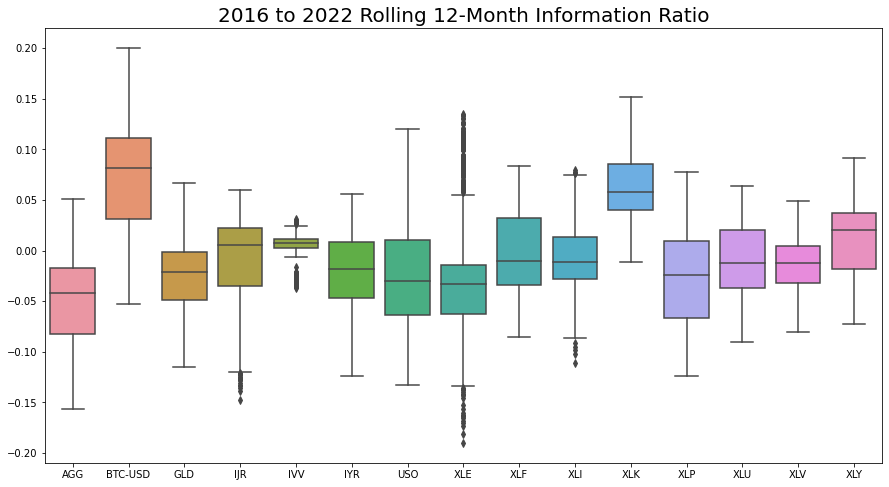

In [15]:
plt.title(f"{startdt} to {enddt} Rolling 12-Month Information Ratio", fontsize=20)
sns.boxplot(data=information_ratio.drop('SPY',axis=1));

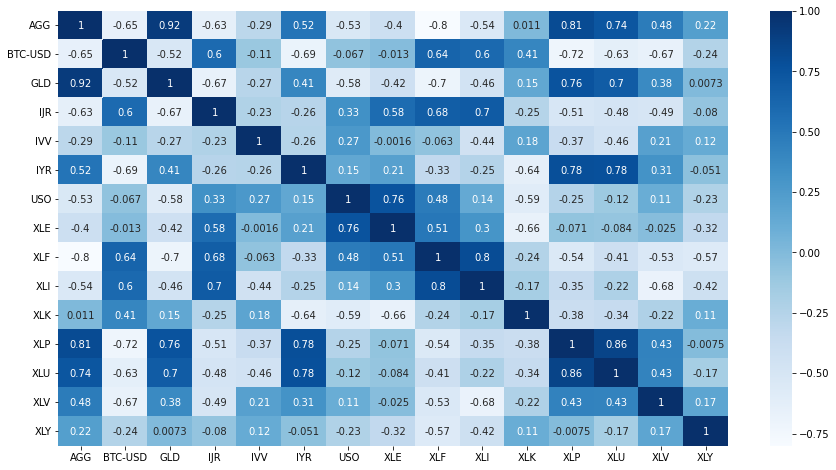

In [16]:
sns.heatmap(data=information_ratio.drop('SPY',axis=1).corr(), annot=True, cmap='Blues');

In [17]:
corr_df = pd.DataFrame(information_ratio.drop('SPY', axis=1).corr().unstack().drop_duplicates(), 
             columns=['Correlation'])

corr_df['+/-'] = np.sign(corr_df['Correlation'])
corr_df.Correlation = abs(corr_df.Correlation)

corr_df[corr_df.Correlation > .7].sort_values(by='Correlation', ascending=False)

Correlation  +/-
AGG     AGG     1.000000  1.0
        GLD     0.916124  1.0
XLP     XLU     0.863975  1.0
AGG     XLP     0.814639  1.0
XLF     XLI     0.804725  1.0
AGG     XLF     0.800510 -1.0
IYR     XLP     0.784410  1.0
        XLU     0.777629  1.0
USO     XLE     0.758095  1.0
GLD     XLP     0.757888  1.0
AGG     XLU     0.738161  1.0
BTC-USD XLP     0.719721 -1.0
IJR     XLI     0.702741  1.0
GLD     XLF     0.700788 -1.0

In [18]:
# Ridgeline Plot 
! pip install joypy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
from joypy import joyplot

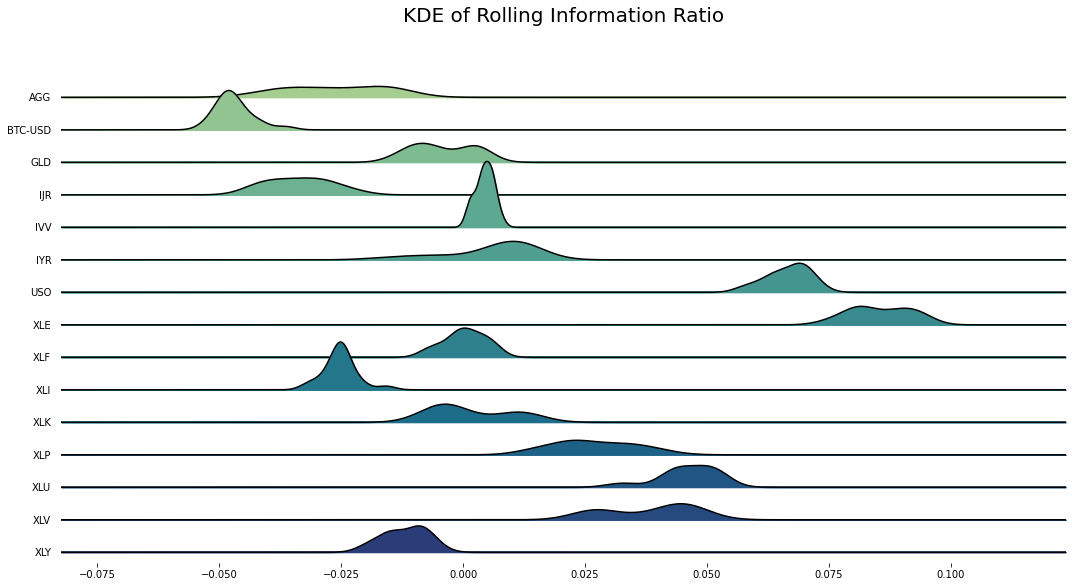

In [22]:
joyplot(information_ratio.dropna(axis=1).last('1Y'),
        colormap=sns.color_palette('crest', as_cmap=True))

plt.title('KDE of Rolling Information Ratio',
          fontsize=20)
plt.show()